#### Course: CS7267
#### Student name: William Stone
#### Student ID: 000272306
#### Assignment: #3
#### Due Date: October 23, 2019
#### Signature:
#### Score:

## Importing the packages used

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

## Equation of a line

In [3]:
def linearPrediction(m,x,b):

    y = (m * x) + b

    return y

## Calculation of error for the slope
#### Function is the partial derivative of the cost function with respect to the slope.

In [4]:
def calcSlopeError(actualValues,predictedValues):

    numSamples = len(actualValues)
    sumOfDifferences = 0
    for i in range(0,numSamples):
        difference = actualValues[i][1] - predictedValues[i]
        difference = difference * actualValues[i][0]
        sumOfDifferences = sumOfDifferences + difference

    slopeError = -2 * sumOfDifferences / numSamples

    return slopeError

## Calculation of error for the intercept
#### Function is the partial derivative of the cost function with respect to the intercept.

In [5]:
def calcInterceptError(actualValues,predictedValues):

    numSamples = len(actualValues)
    sumOfDifferences = 0
    for i in range(0,numSamples):
        difference = actualValues[i][1] - predictedValues[i]
        sumOfDifferences = sumOfDifferences + difference

    interceptError = -2 * sumOfDifferences / numSamples

    return interceptError

## Gradient descent algorithm
#### Slope and intercept are initialized to zero. For the specified number epochs the algorithm calculates the error of the predicted values calculated by the linear regression and the actual values. The slope and intercept are updated each epoch in attempt to decrease the error of the best-fit line.

In [6]:
def gradientDescent(data,learningRate,epochLimit):

    m = 0
    b = 0

    for i in range(epochLimit):
        predictions = [linearPrediction(m, x[0], b) for x in data]
        mPrime = calcSlopeError(data,predictions)
        bPrime = calcInterceptError(data,predictions)

        m = m - (learningRate * mPrime)
        b = b - (learningRate * bPrime)

    return m, b

## Calculation of mean squared error

In [7]:
def calcMeanSquareError(actualValues,predictedValues):

    lengthOfData = len(actualValues)
    sumOfSquaredDiffernces = 0
    for i in range(lengthOfData):
        difference = actualValues[i][1] - predictedValues[i]
        sumOfSquaredDiffernces = sumOfSquaredDiffernces + (difference**2)

    return sumOfSquaredDiffernces / lengthOfData

## Exploration of learning rates
#### Here a range of potential learning rates are explored. The one resulting in the best mean squared error is used in the final gradient descent calculation of the best-fit line.

In [8]:
def exploreLearningRate(data,epochLimit):

    learningRates = [
        0.00008,0.0001,0.00012,0.00014,0.00016,0.00018,0.00020,
        0.00022,0.00024,0.00026,0.00028,0.00030,0.00032,0.00034,
        0.00036,0.00038,0.00040,0.00042,0.00044,0.00046,0.00048,
        ]

    results = [gradientDescent(data,rate,epochLimit) for rate in learningRates]
    indexOfBestResult = 0
    bestError = calcMeanSquareError(data,[linearPrediction(results[0][0],datum[0],results[0][1]) for datum in data])

    for result in results[1:]:
        slope = result[0]
        intercept = result[1]
        resultAccuracy = calcMeanSquareError(data,[linearPrediction(slope,datum[0],intercept) for datum in data])

        if resultAccuracy < bestError:
            indexOfBestResult = results.index(result)
            bestError = resultAccuracy
        elif resultAccuracy > bestError:
            break

    return learningRates[indexOfBestResult]

## Exploration of epochs
#### Here we explore the returns of performing more epochs in the algorithm. We expect that accuracy increases as the algorithm invests more time in finding a solution.
#### The mean square error of the linear regression created at epochs ranging from 10000 to 100000 is plotted versus the time it takes to complete that epoch.
#### Data is normalized to make the figure more readable.

In [9]:
def exploreEpochLimit(data,learningRate):

    epochLimits = [i for i in range(10000,100000,5000)]
    results = []
    resultTimes = []
    for epochs in epochLimits:
        startTime = time.time()
        result = gradientDescent(data,learningRate,epochs)
        stopTime = time.time()
        results.append(result)
        resultTimes.append(stopTime-startTime)
        
    epochAccuracy = []
    for result in results:
        slope = result[0]
        intercept = result[1]
        resultAccuracy = calcMeanSquareError(data,[linearPrediction(slope,datum[0],intercept) for datum in data])
        epochAccuracy.append(resultAccuracy)

    minTime = resultTimes[0]
    maxTime = resultTimes[len(resultTimes)-1]
    resultTimes = [(times - minTime) / (maxTime - minTime) for times in resultTimes]

    minAccuracy = epochAccuracy[0]
    maxAccuracy = epochAccuracy[len(epochAccuracy)-1]
    epochAccuracy = [(epoch - minAccuracy) / (maxAccuracy - minAccuracy) for epoch in epochAccuracy]
    
    plt.rcParams['figure.figsize'] = (12.0,9.0)
    plt.xlabel('Resultant Accuracy')
    plt.ylabel('Computation Time')
    plt.title('Effect of Increasing Epoch Limit')
    plt.plot(epochAccuracy,resultTimes)
    plt.show()

## A function that prints the graph of blood pressure versus a person's age.

In [10]:
def plotDataWithRegression(data,slope,intercept):

    xRange = [age for age in range(15,75)]
    yRange = [linearPrediction(slope,age,intercept) for age in xRange]

    plt.rcParams['figure.figsize'] = (12.0,9.0)
    plt.scatter([x[0] for x in data],[y[1] for y in data])
    plt.plot(xRange,yRange)
    plt.xlabel('Age')
    plt.ylabel('Blood Pressure')
    plt.title('Predicting B.P. Based on Age')
    plt.show()

## Driver Function
#### Sets the data for the model, calls the functions that find the learning rate, explores the computation time cost of increasing epochs, and plots the final regression line.
#### An epoch limit is set to 100000 to keep things simple

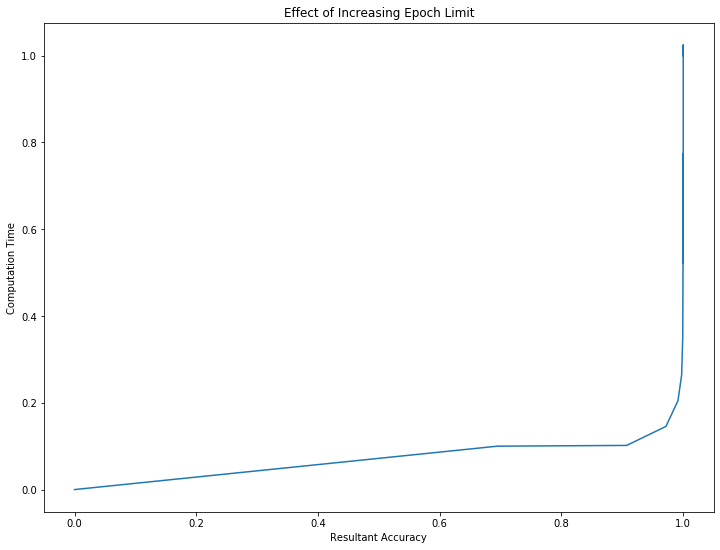

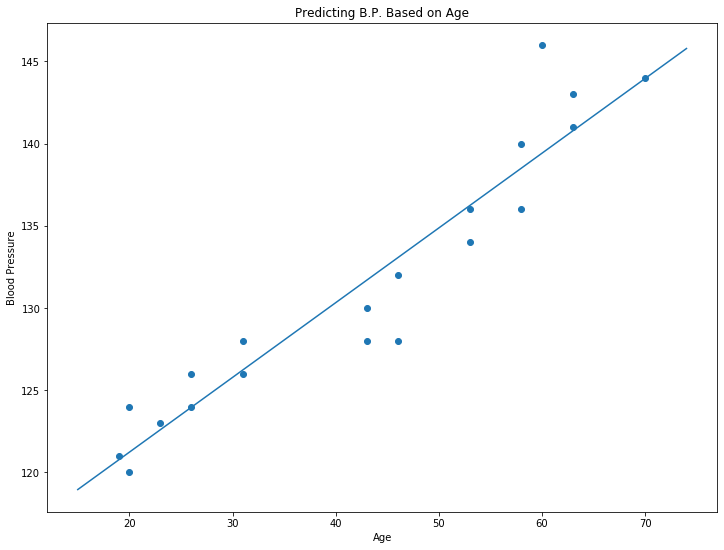

Final slope: 0.4547978059135336, intercept: 112.12551301198316


In [11]:
def main():

    trainingData = [
        (20,120), (43,128), (63,141), (26,126), (53,134), (31,128), (58,136),
        (46,132), (58,140), (70,144), (46,128), (53,136), (60,146), (20,124), (63,143),
        (43,130), (26,124), (19,121), (31,126), (23,123)
        ]

    
    numOfSamples = len(trainingData)
    
    # learningRate = 0.0001
    epochLimit = 100000
    myLearningRate = exploreLearningRate(trainingData,epochLimit)

    exploreEpochLimit(trainingData,myLearningRate)
    
    m, b = gradientDescent(trainingData,myLearningRate,epochLimit)
    plotDataWithRegression(trainingData,m,b)
    print(f"Final slope: {m}, intercept: {b}")

    


if __name__ == '__main__':
    main()